# **Lab Session 2**
**Learing Objectives**
1. Undertand the concept of descriptive analystics
2. Learn to load structured data onto Dataframe and perfrom exploratory data analysis
3. Learn data preparation activiitves such as filtering, grouping, ordering and joining od datasets
4. Leaarn to handle missing values
5. Learn to prepare plots such as bar plot, histogram, distribution plot, box plot, scatter plot, pair plot and heat maps to find insights

# **Loading the dataset onto a DataFrame**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [23]:
bollywood_df = pd.read_csv( 'https://raw.githubusercontent.com/sadhanai/LAB02/main/bollywood.csv' )

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
Test_df = pd.read_csv('/content/drive/MyDrive/M Tech/ML Lab/Lab 02/bollywood.csv')

In [24]:
type(bollywood_df)
type(Test_df)

pandas.core.frame.DataFrame

# **Displaying first few records of the DataFrame**

In [5]:
pd.set_option('display.max_columns', 7)

In [6]:
bollywood_df.head(5)

,SlNo,Release Date,MovieName,...,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,...,8576361,26622,2527
1,2,04-Jan-13,Table No. 21,...,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,...,572336,586,54
3,4,04-Jan-13,Rajdhani Express,...,42626,86,19
4,5,04-Jul-14,Bobby Jasoos,...,3113427,4512,1224


1.	How many records are present in the dataset? Print the metadata information of the dataset.

In [8]:
# Get the number of records
num_records = len(bollywood_df)
# Print the metadata information
print("Number of records:", num_records)
print("\nMetadata information:")
print(bollywood_df.info())

Number of records: 149

Metadata information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


2.	How many movies got released in each genre? Which genre had highest number of releases? Son number of releases in each genre in descending order.

In [14]:
genre_counts = bollywood_df['Genre'].value_counts()

# Print the genre counts
print("Number of movies released in each genre:")
print(genre_counts)

# Find the genre with the highest number of releases
most_common_genre = genre_counts.idxmax()
print("\nGenre with the highest number of releases:", most_common_genre)

Number of movies released in each genre:
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

Genre with the highest number of releases: Comedy


3.	How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and Release Time.)

In [20]:

# Display the column names in your dataset
print("Column names in the dataset:", data.columns)

# Create a cross-tabulation between Genre and Release Time
genre_release_crosstab = pd.crosstab(bollywood_df['Genre'], bollywood_df['ReleaseTime'])

# Print the cross-tabulation
print("Cross-tabulation between Genre and Release Time:")
print(genre_release_crosstab)




Column names in the dataset: Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')
Cross-tabulation between Genre and Release Time:
ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2


4.	Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from Release Date column.)

In [21]:


# Convert 'Release Date' column to datetime format
bollywood_df['Release Date'] = pd.to_datetime(bollywood_df['Release Date'])

# Extract the month from 'Release Date' and create a new column 'Month'
bollywood_df['Month'] = bollywood_df['Release Date'].dt.month

# Count the number of movie releases for each month
month_counts = bollywood_df['Month'].value_counts()

# Find the month with the maximum number of releases
max_release_month = month_counts.idxmax()

# Get the month name from the month number
month_name = bollywood_df['Release Date'].dt.strftime('%B').unique()[max_release_month - 1]

# Print the result
print("Month with the maximum number of movie releases:", month_name)


Month with the maximum number of movie releases: April


5.	Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [23]:

# Convert 'Release Date' column to datetime format
bollywood_df['Release Date'] = pd.to_datetime(bollywood_df['Release Date'])

# Extract the month from 'Release Date' and create a new column 'Month'
bollywood_df['Month'] = bollywood_df['Release Date'].dt.month

# Filter high-budget movies (budget of 25 crore or more)
high_budget_movies = bollywood_df[bollywood_df['Budget'] >= 25]

# Count the number of high-budget movie releases for each month
high_budget_month_counts = high_budget_movies['Month'].value_counts()

# Find the month with the maximum number of high-budget releases
max_high_budget_month = high_budget_month_counts.idxmax()

# Get the month name from the month number
month_name = bollywood_df['Release Date'].dt.strftime('%B').unique()[max_high_budget_month - 1]

# Print the result
print("Month with the most high-budget movie releases:", month_name)


Month with the most high-budget movie releases: January


6.	Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection - Budget) / Budget.

In [25]:

# Calculate ROI for each movie
bollywood_df['ROI'] = (bollywood_df['BoxOfficeCollection'] - bollywood_df['Budget']) / bollywood_df['Budget']

# Sort the DataFrame by ROI in descending order
sorted_bollywood_df = bollywood_df.sort_values(by='ROI', ascending=False)

# Select the top 10 movies with maximum ROI
top_10_movies = sorted_bollywood_df.head(10)

# Print the top 10 movies with maximum ROI
print("Top 10 movies with maximum return on investment:")
print(top_10_movies[['MovieName', 'ROI']])


Top 10 movies with maximum return on investment:
                     MovieName   ROI
64                  Aashiqui 2 8.167
89                          PK 7.647
132                Grand Masti 7.514
135               The Lunchbox 7.500
87                      Fukrey 6.240
58                    Mary Kom 5.933
128                     Shahid 5.667
37   Humpty Sharma Ki Dulhania 5.500
101         Bhaag Milkha Bhaag 4.467
115            Chennai Express 4.267


7.	Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [27]:


# Calculate ROI for each movie
bollywood_df['ROI'] = (bollywood_df['BoxOfficeCollection'] - bollywood_df['Budget']) / bollywood_df['Budget']

# Calculate average ROI for different release times
average_roi_by_release_time = bollywood_df.groupby('ReleaseTime')['ROI'].mean()

# Print the average ROI for different release times
print("Average ROI for different release times:")
print(average_roi_by_release_time)


Average ROI for different release times:
ReleaseTime
FS   0.974
HS   0.851
LW   1.127
N    0.658
Name: ROI, dtype: float64


8.	Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

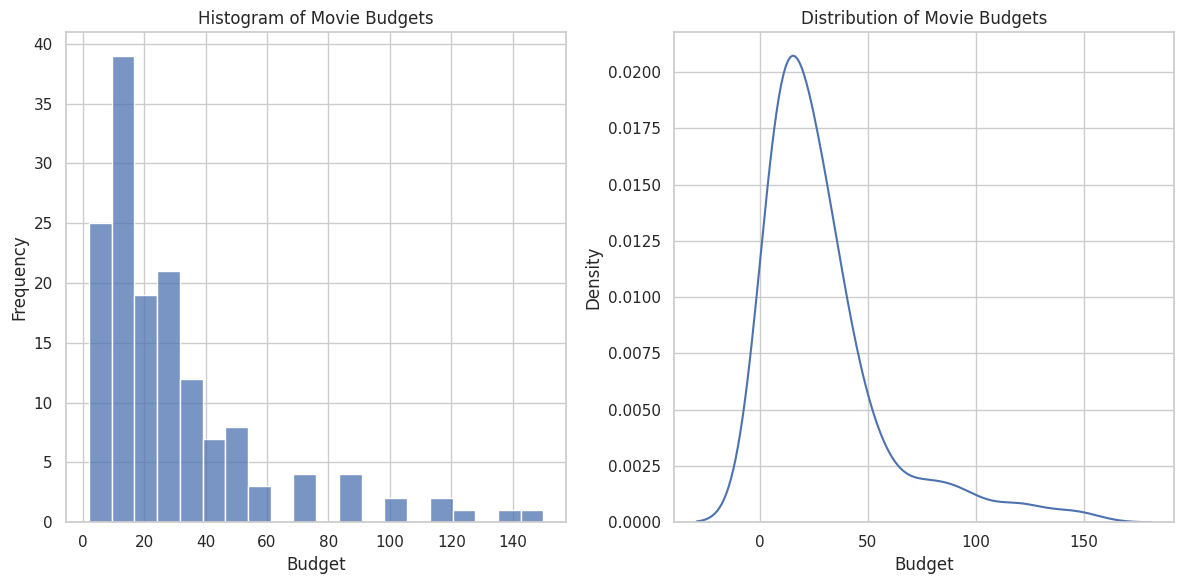

In [29]:

# Set up the visualization style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a histogram of movie budgets
sns.histplot(bollywood_df['Budget'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram of Movie Budgets')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Frequency')

# Plot a distribution plot (kernel density plot) of movie budgets
sns.kdeplot(bollywood_df['Budget'], ax=axes[1])
axes[1].set_title('Distribution of Movie Budgets')
axes[1].set_xlabel('Budget')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


9.	Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

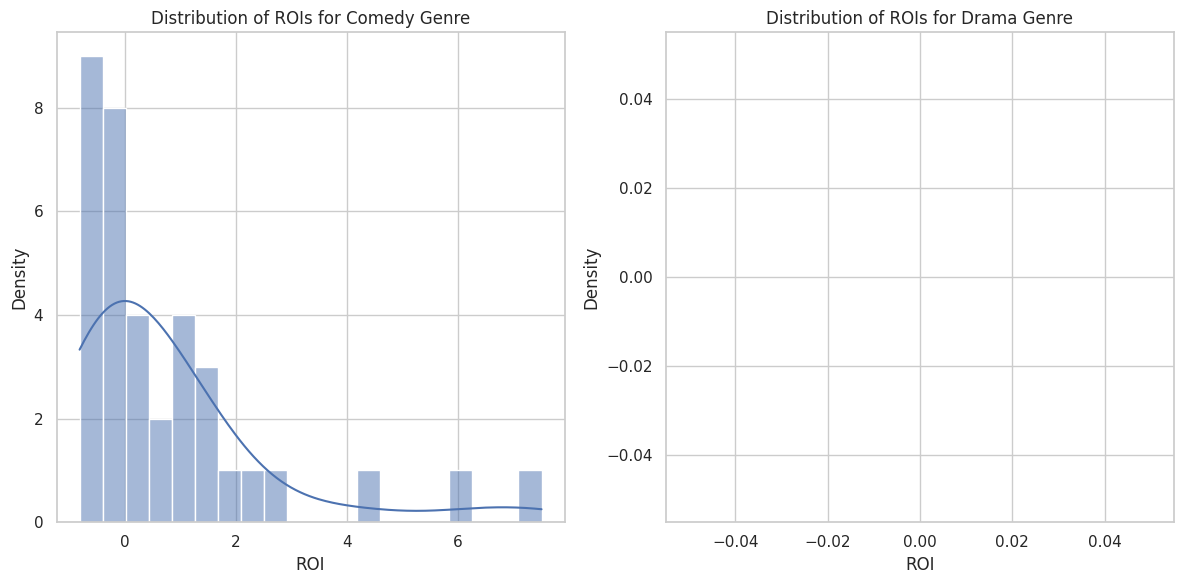

In [32]:


# Calculate ROI for each movie
bollywood_df['ROI'] = (bollywood_df['BoxOfficeCollection'] - bollywood_df['Budget']) / bollywood_df['Budget']

# Filter data for comedy and drama genres
comedy_bollywood_df = bollywood_df[bollywood_df['Genre'] == 'Comedy']
drama_bollywood_df = bollywood_df[bollywood_df['Genre'] == 'Drama']

# Set up the visualization style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of ROIs for comedy genre
sns.histplot(comedy_bollywood_df['ROI'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of ROIs for Comedy Genre')
axes[0].set_xlabel('ROI')
axes[0].set_ylabel('Density')

# Plot distribution of ROIs for drama genre
sns.histplot(drama_bollywood_df['ROI'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of ROIs for Drama Genre')
axes[1].set_xlabel('ROI')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [33]:
# Calculate summary statistics for ROIs in each genre
comedy_roi_stats = comedy_bollywood_df['ROI'].describe()
drama_roi_stats = drama_bollywood_df['ROI'].describe()

# Print the summary statistics
print("Summary statistics for ROIs in Comedy Genre:")
print(comedy_roi_stats)

print("\nSummary statistics for ROIs in Drama Genre:")
print(drama_roi_stats)


Summary statistics for ROIs in Comedy Genre:
count   36.000
mean     0.788
std      1.876
min     -0.821
25%     -0.414
50%      0.236
75%      1.223
max      7.514
Name: ROI, dtype: float64

Summary statistics for ROIs in Drama Genre:
count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: ROI, dtype: float64


10.	Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [25]:
  import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/sadhanai/LAB02/main/bollywood.csv')

# Calculate the Pearson correlation coefficient
correlation = np.corrcoef(data['BoxOfficeCollection'], data['YoutubeLikes'])[0, 1]

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation)

# Interpret the correlation
if correlation > 0:
    print("The correlation is positive.")
elif correlation < 0:
    print("The correlation is negative.")
else:
    print("There is no linear correlation between the variables.")


Pearson correlation coefficient: 0.6825165877731297
The correlation is positive.


11.	Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

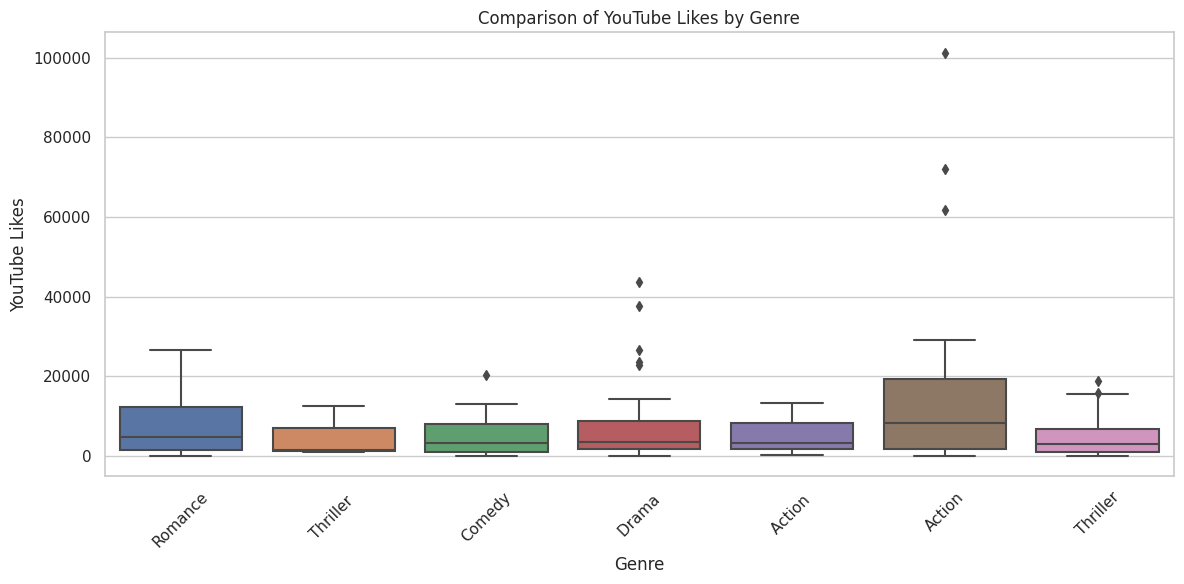

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/M Tech/ML Lab/Lab 02/bollywood.csv')

# Set up the visualization style
sns.set(style="whitegrid")

# Create a boxplot to compare YouTube likes for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Genre', y='YoutubeLikes')
plt.title('Comparison of YouTube Likes by Genre')
plt.xlabel('Genre')
plt.ylabel('YouTube Likes')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


12. Which of the variables among Budget, BoxOfficeCollection, Youtube View, YoutubeLikes, Youtube Dislikes are highly correlated? Note: Draw pair plot or heatmap.

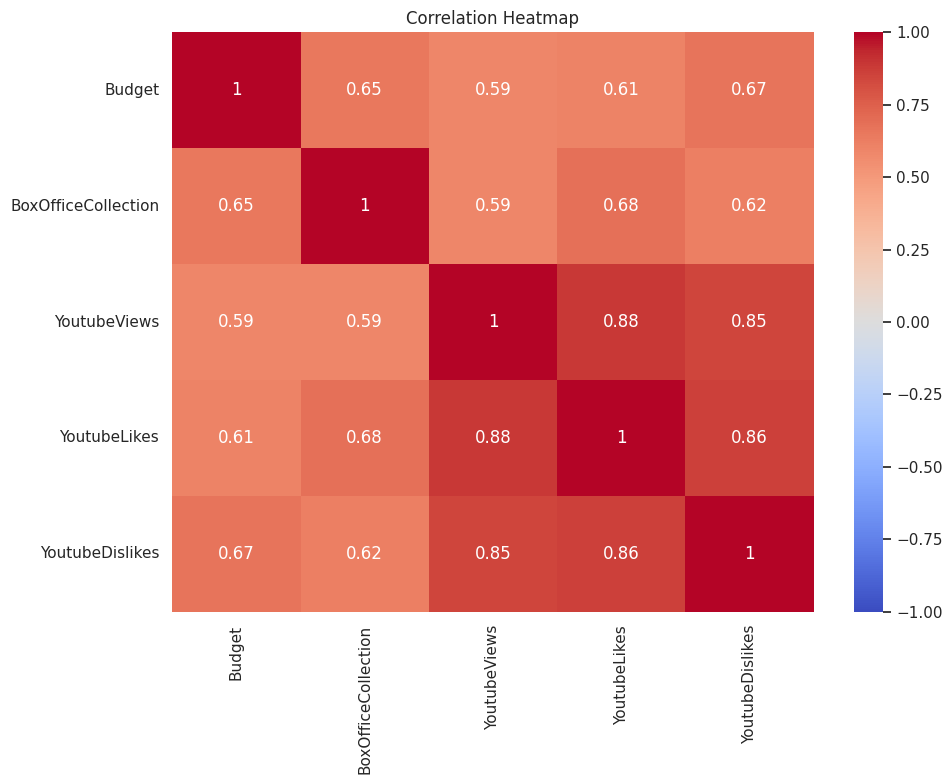

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/M Tech/ML Lab/Lab 02/bollywood.csv')

# Select the columns for analysis
columns_of_interest = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
selected_data = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Set up the visualization style
sns.set(style="whitegrid")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()

# Show the heatmap
plt.show()
